In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
from pandas import DataFrame, Series
from math import isnan
import matplotlib.pyplot as plt
import matplotlib
import datetime
from scipy.stats import gaussian_kde
# Numpy options
np.random.seed(78)
# Pandas options
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 400)
# Matplotlib options
matplotlib.rcParams['image.cmap'] = 'viridis'
%matplotlib inline
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (40,30)

In [2]:
collisions = pd.read_csv('bike_coll_rate.csv', low_memory=False)

In [3]:
#collisions = collisions.drop(collisions.columns[0], axis=1)
collisions.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Counts,Collision Rate,LAT,LONG
0,03/24/2017,11:00,BROOKLYN,11235.0,40.587780,-73.95238,"(40.58778,-73.95238)",NaN,NaN,2615 EAST 17 STREET,1,0,0,0,1,0,0,0,Turning Improperly,Unspecified,NaN,NaN,NaN,3639488,BICYCLE,PASSENGER VEHICLE,NaN,NaN,NaN,156425.0,0.003503,40.59,-73.95
1,03/24/2017,15:45,BROOKLYN,11238.0,40.679420,-73.96823,"(40.67942,-73.96823)",VANDERBILT AVENUE,BERGEN STREET,NaN,0,0,0,0,0,0,0,0,Unsafe Lane Changing,Unspecified,NaN,NaN,NaN,3639696,PASSENGER VEHICLE,BICYCLE,NaN,NaN,NaN,9874.0,0.055494,40.68,-73.97
2,03/24/2017,16:50,BRONX,10467.0,40.880780,-73.88347,"(40.88078,-73.88347)",JEROME AVENUE,EAST 208 STREET,NaN,1,0,0,0,1,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3638752,BICYCLE,NaN,NaN,NaN,NaN,2909.0,0.188362,40.88,-73.88
3,03/24/2017,18:40,MANHATTAN,10002.0,40.713688,-73.99459,"(40.713688,-73.99459)",EAST BROADWAY,MARKET STREET,NaN,1,0,1,0,0,0,0,0,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,3639287,BICYCLE,NaN,NaN,NaN,NaN,24005.0,0.022826,40.71,-73.99
4,03/24/2017,19:05,MANHATTAN,10037.0,40.814670,-73.93623,"(40.81467,-73.93623)",5 AVENUE,EAST 138 STREET,NaN,1,0,1,0,0,0,0,0,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,NaN,NaN,NaN,3638488,BICYCLE,NaN,NaN,NaN,NaN,11984.0,0.045723,40.81,-73.94


In [4]:
xmin = -74.3
xmax = -73.69
ymin = 40.49
ymax = 40.92

In [5]:
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([collisions['LONGITUDE'], collisions['LATITUDE']])
kernel = stats.gaussian_kde(values)

In [6]:
Z = np.reshape(kernel(positions).T, X.shape)

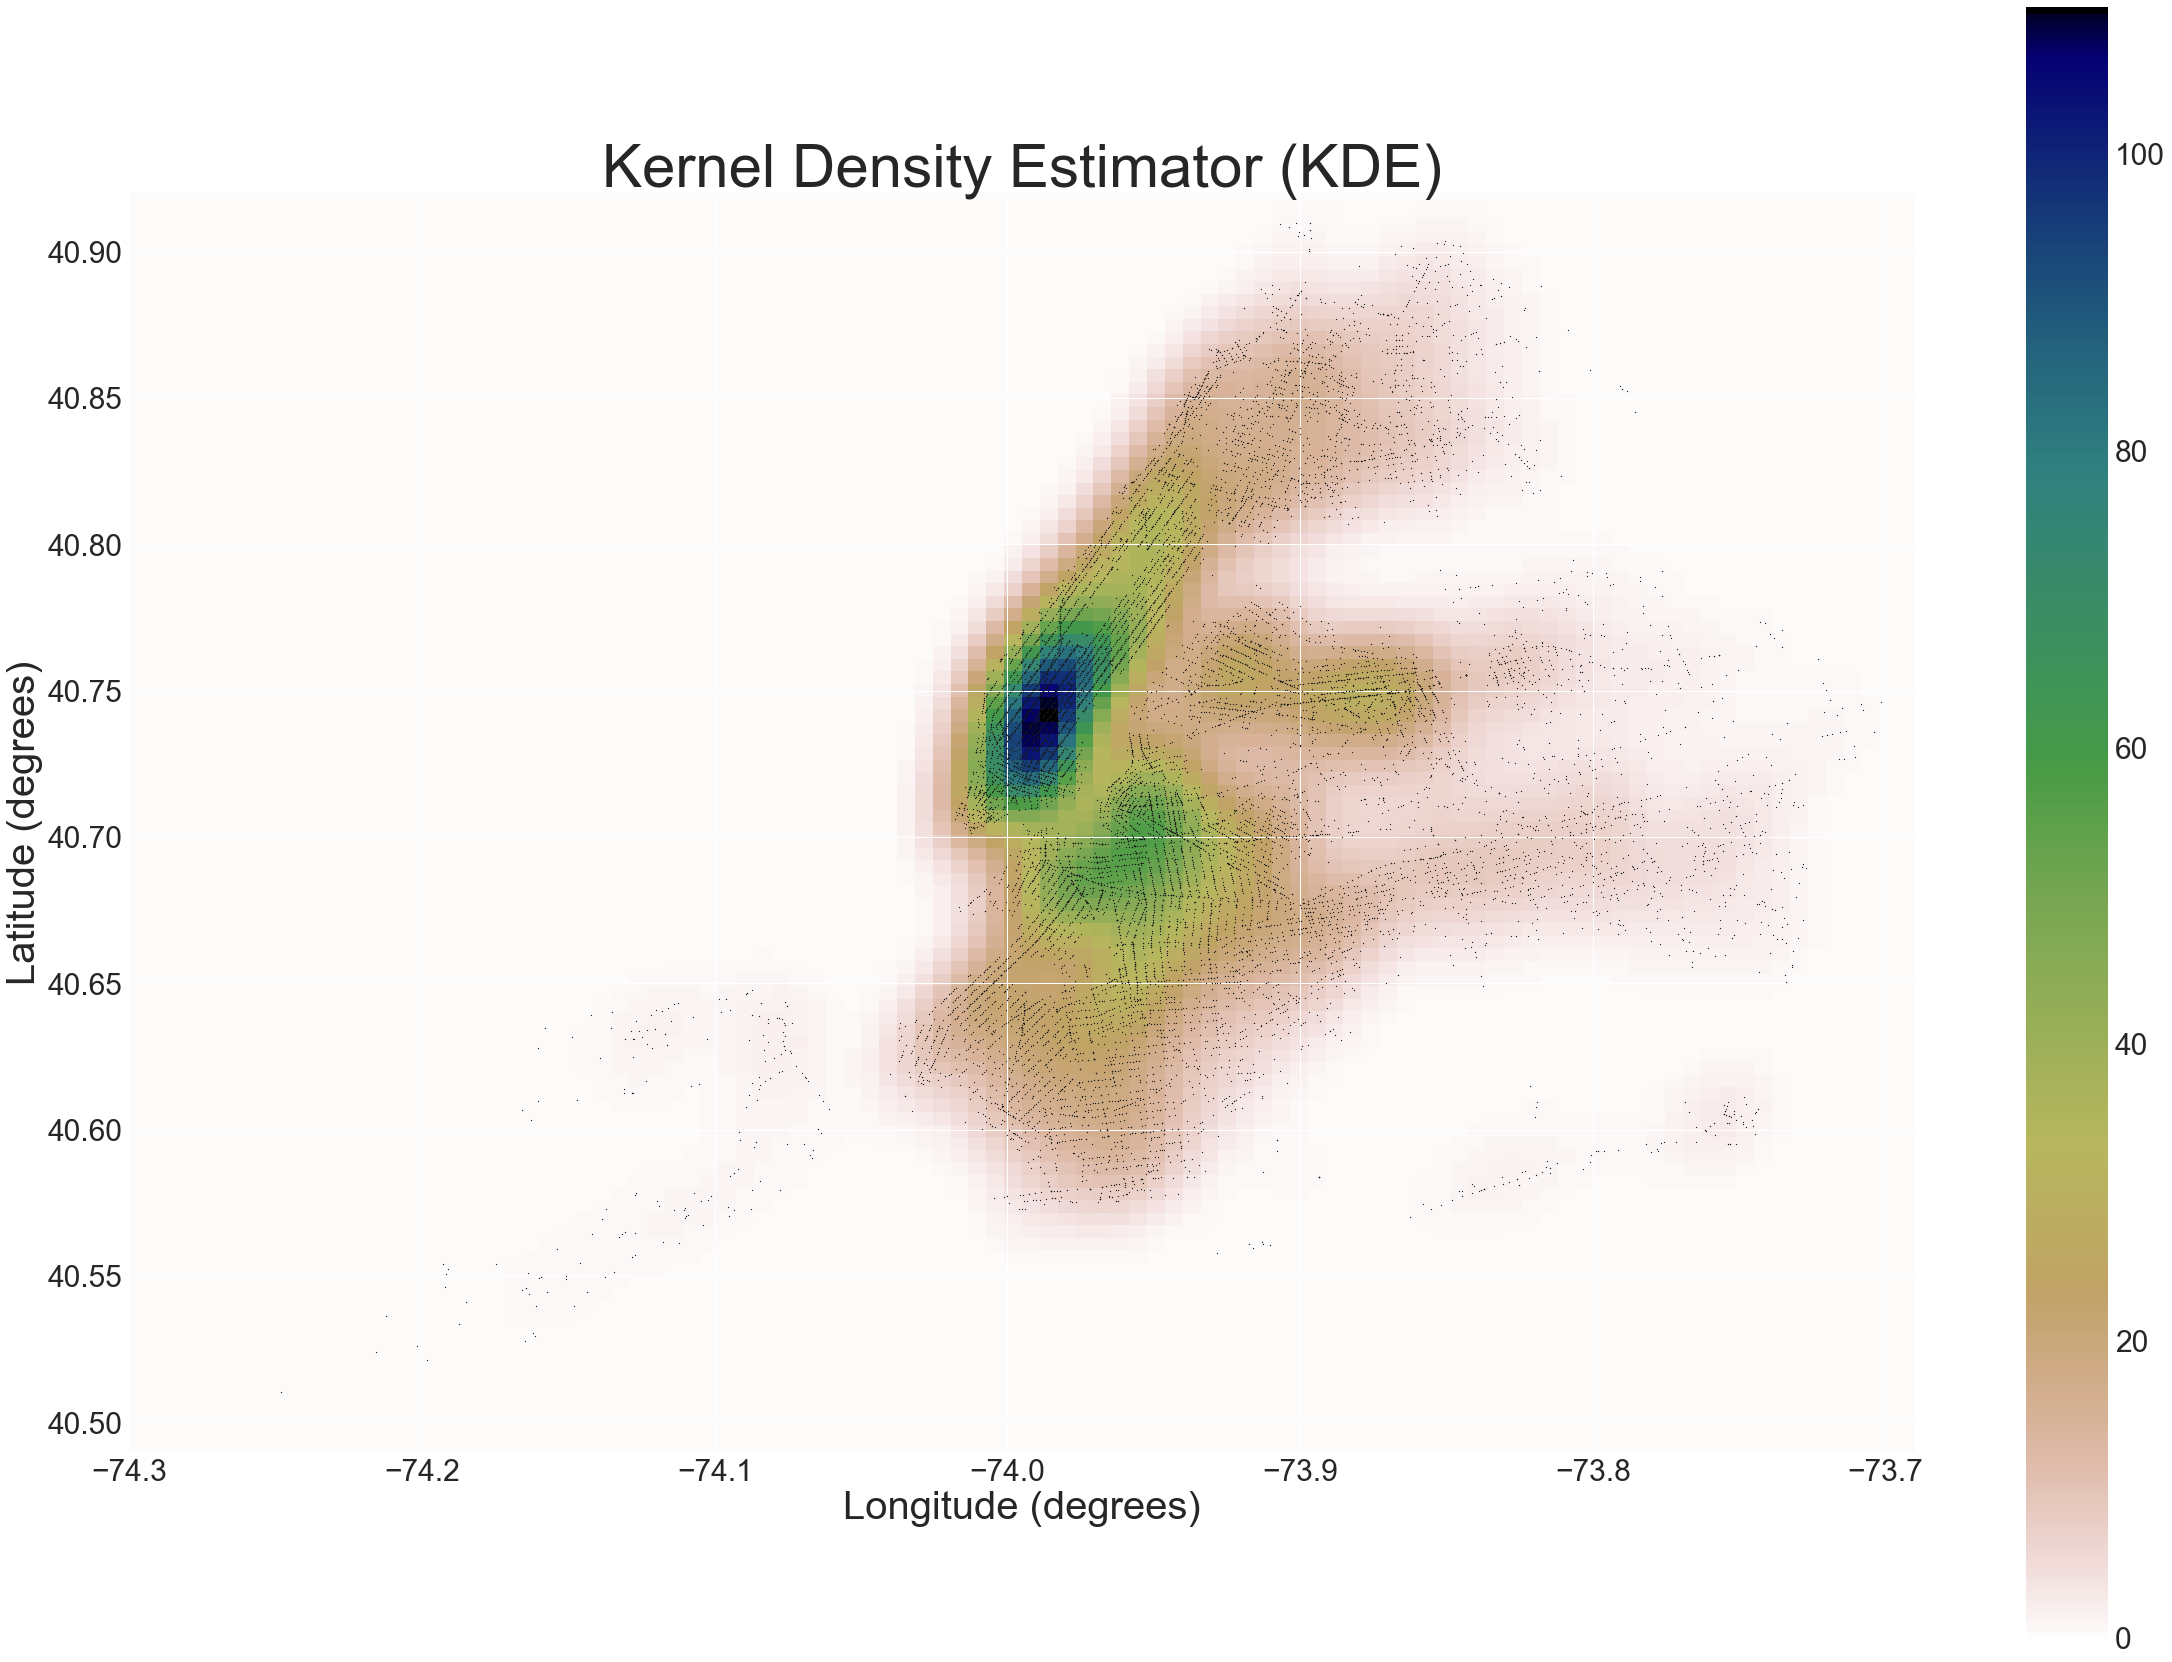

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
graph = ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r, extent=[xmin, xmax, ymin, ymax])
#cset = ax.contourf(X, Y, Z, cmap=plt.cm.gist_earth_r)
cbar = fig.colorbar(graph)
cbar.ax.tick_params(labelsize=30)
ax.plot(collisions['LONGITUDE'], collisions['LATITUDE'], 'k.', markersize=2.5)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.title('Kernel Density Estimator (KDE)', fontsize=60)
plt.xlabel('Longitude (degrees)', fontsize=40)
plt.ylabel('Latitude (degrees)', fontsize=40)
ax.tick_params(axis='both', labelsize=30)
plt.show()

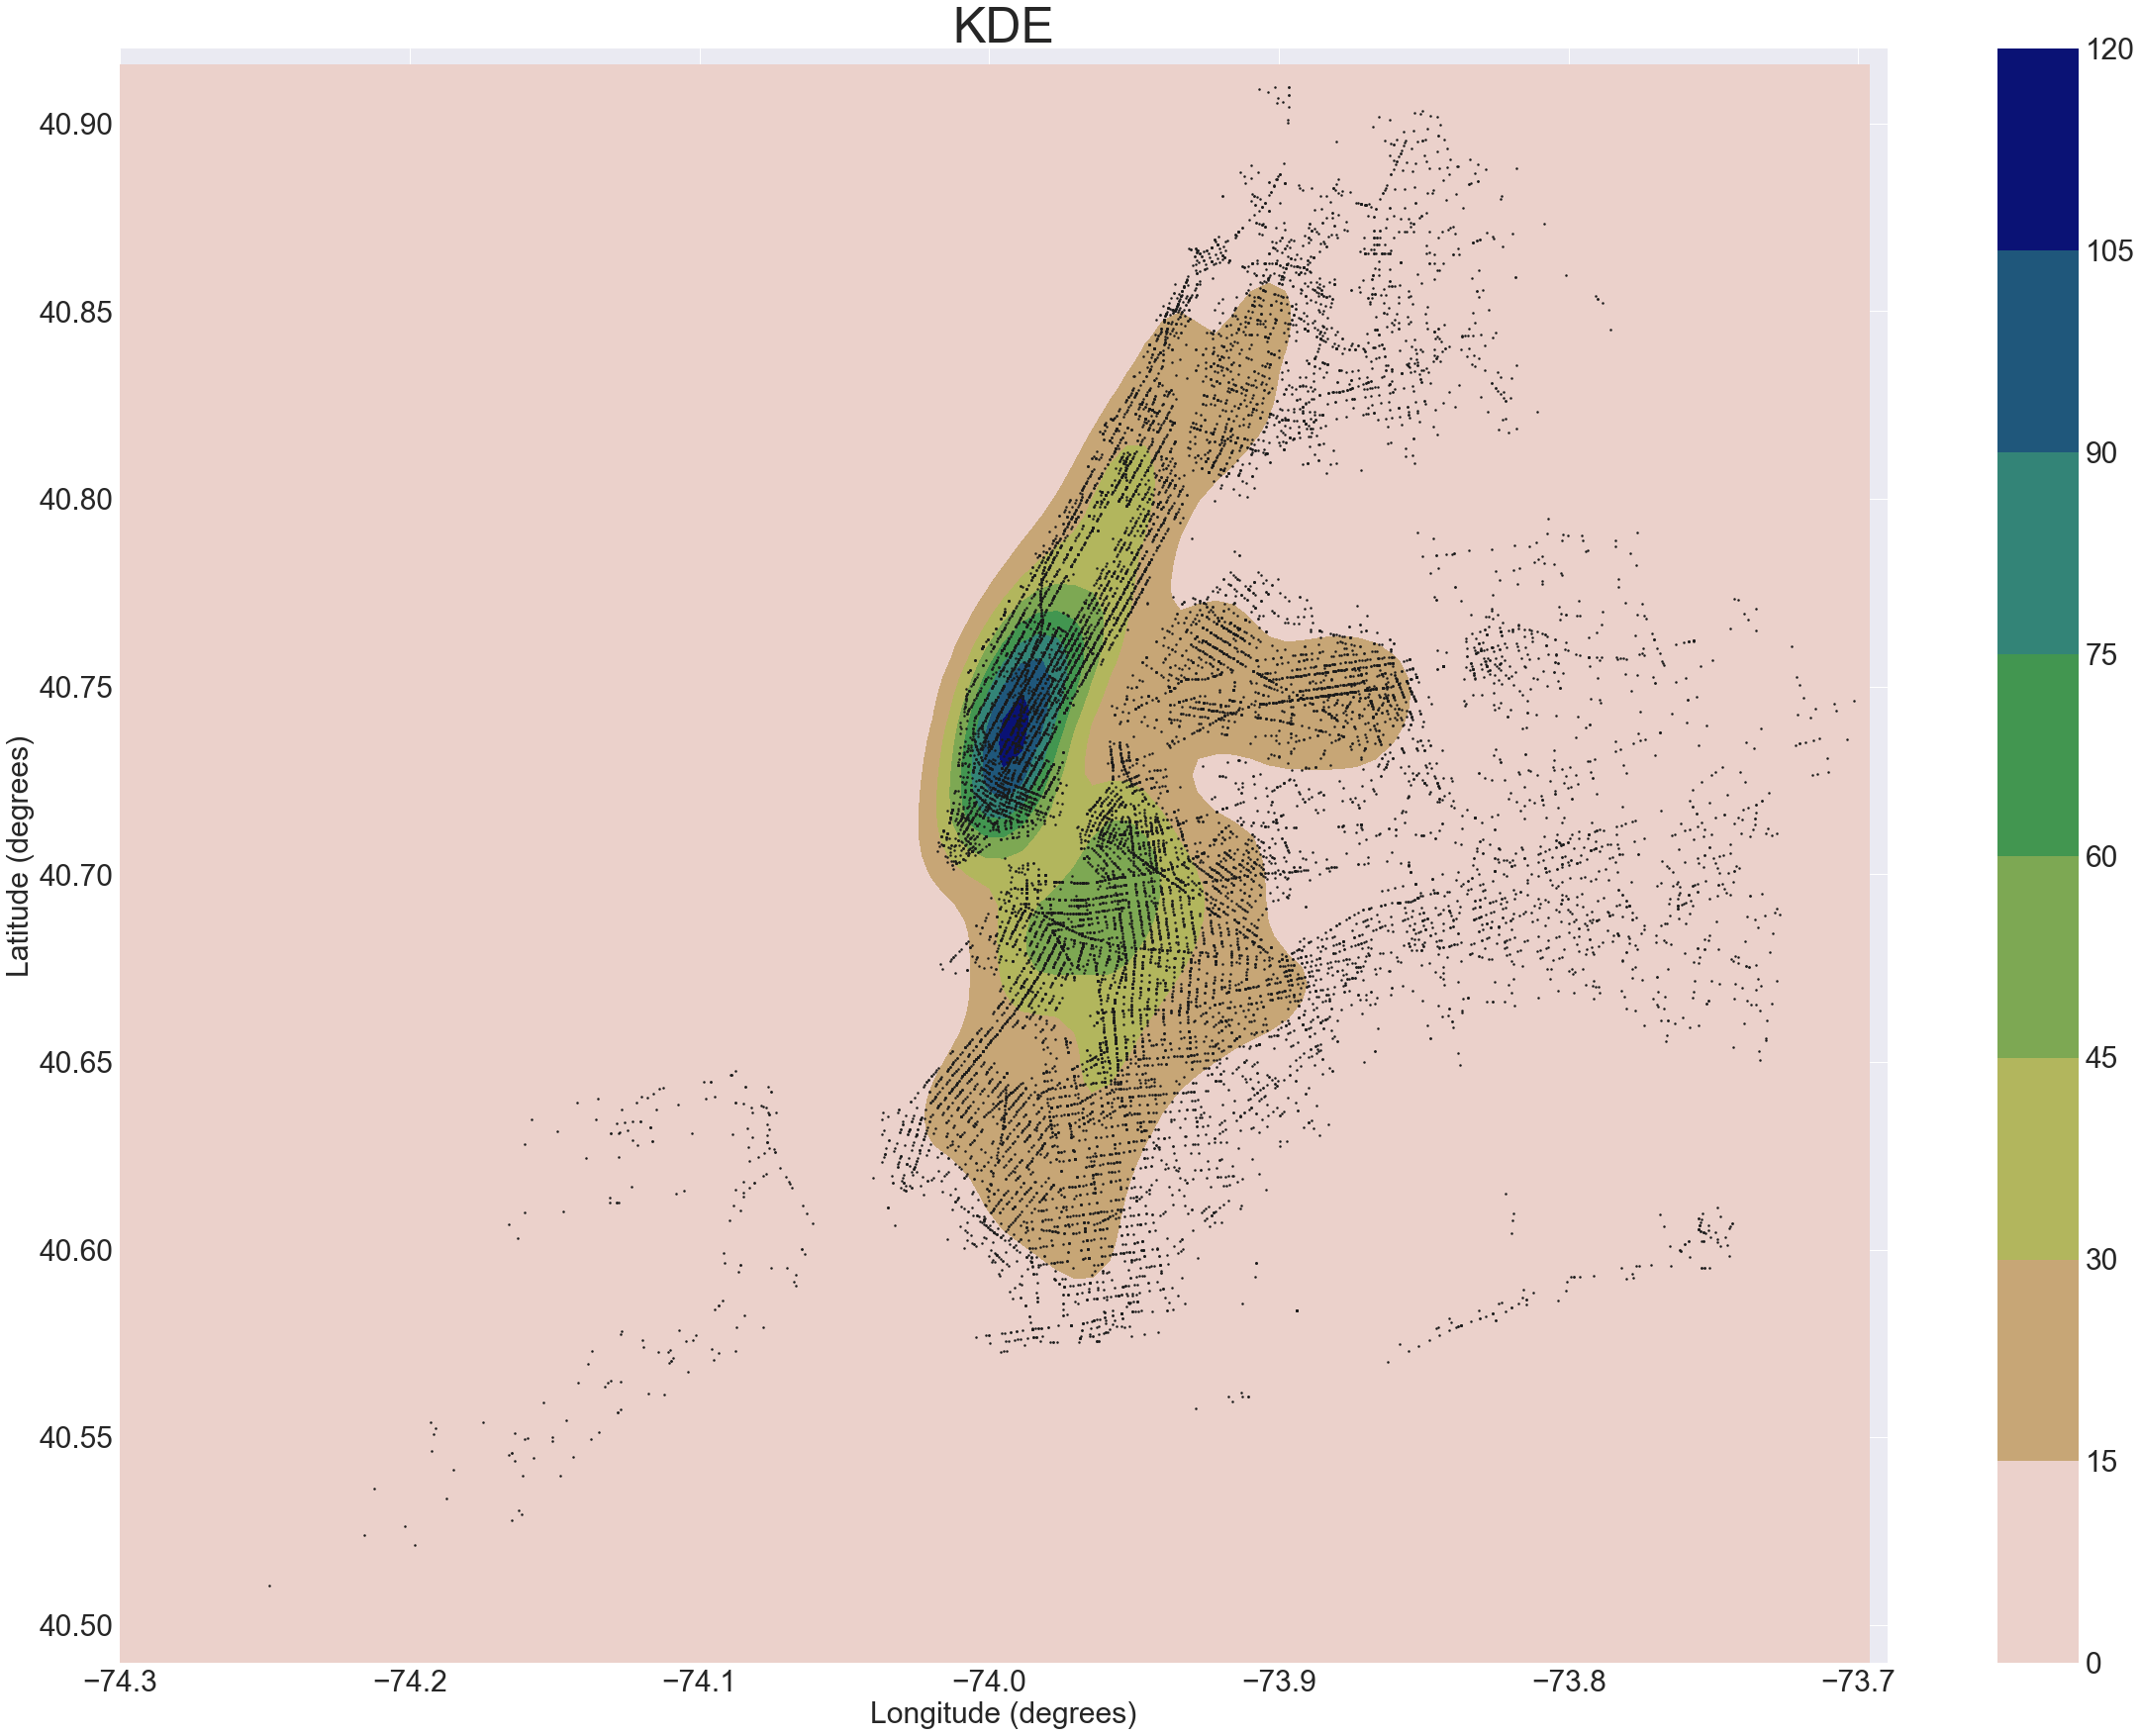

In [12]:
import seaborn as sns
import seaborn as sns; sns.set(color_codes=True)
from scipy import stats
matplotlib.rcParams['figure.figsize'] = (40,30)

xx, yy = np.mgrid[xmin:xmax:.0061, ymin:ymax:.0043]

f, ax = plt.subplots()
cset = ax.contourf(xx, yy, Z, cmap=plt.cm.gist_earth_r)
cbar = f.colorbar(cset)
cbar.ax.tick_params(labelsize=30)
ax.plot(collisions['LONGITUDE'], collisions['LATITUDE'], 'k.', markersize=5)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.title('KDE', fontsize=50)
plt.xlabel('Longitude (degrees)', fontsize=30)
plt.ylabel('Latitude (degrees)', fontsize=30)
ax.tick_params(axis='both', labelsize=30)
plt.show()